In [142]:
import pandas as pd
import io
import matplotlib.pyplot as plt

#Agregado del dataframe e importar las librerías neccesarioas

csv_data = pd.read_csv('DnD5e_Monsters_Stats.csv', delimiter=',', index_col=0) 
df = pd.DataFrame(csv_data)
df #aca imprime el DF

,Armor Class,Hit Points,Speed,CR,STR,DEX,CON,INT,WIS,CHA,Type,Alignment
Name,,,,,,,,,,,,
Aarakocra,12,13,"20 ft., fly 50 ft.",0.25,10,14,10,11,12,11,Medium humanoid (Aarakocra),neutral good
Aboleth,17,135,"10 ft., swim 40 ft.",10.00,21,9,15,18,15,18,Large aberration,lawful evil
Abominable Yeti,15,137,"40 ft., climb 40 ft.",9.00,24,10,22,9,13,9,Huge monstrosity,chaotic evil
Acolyte,10,9,30 ft.,0.25,10,10,10,10,14,11,Medium humanoid (any race),any alignment
Adult Black Dragon,19,195,"40 ft., fly 80 ft., swim 40 ft.",14.00,23,14,21,14,13,17,Huge dragon (Chromatic),chaotic evil
...,...,...,...,...,...,...,...,...,...,...,...,...
Young White Dragon,17,133,"40 ft., burrow 20 ft., fly 80 ft., swim 40 ft.",6.00,18,10,18,6,11,12,Large dragon (Chromatic),chaotic evil
Yuan-ti Abomination,15,127,40 ft.,7.00,19,16,17,17,15,18,"Large monstrosity (Shapechanger, Yuan-ti)",neutral evil
Yuan-ti Malison,12,66,30 ft.,3.00,16,14,13,14,12,16,"Medium monstrosity (Shapechanger, Yuan-ti)",neutral evil


In [143]:
#Mover CR como última columna

cols = list(df.columns)
cols.remove('CR')
df = df[[*cols, 'CR']]

In [144]:
#Correlación de datos no normalizados
numeric_df = df.select_dtypes(include=['number']) # Selecciono los datos numéricos
correlations = numeric_df.corr(method='pearson') # Correlacion entre variables todavía no normalizadas

correlations

,Armor Class,Hit Points,STR,DEX,CON,INT,WIS,CHA,CR
Armor Class,1.000000,0.689411,0.559285,0.259032,0.655396,0.590243,0.476521,0.639579,0.739156
Hit Points,0.689411,1.000000,0.737359,-0.083645,0.868687,0.490320,0.442377,0.592163,0.933268
STR,0.559285,0.737359,1.000000,-0.218743,0.848086,0.310819,0.344478,0.429674,0.677147
DEX,0.259032,-0.083645,-0.218743,1.000000,-0.155937,0.273928,0.358252,0.269375,0.013128
CON,0.655396,0.868687,0.848086,-0.155937,1.000000,0.425709,0.409846,0.541861,0.824834
INT,0.590243,0.490320,0.310819,0.273928,0.425709,1.000000,0.632674,0.893249,0.604942
WIS,0.476521,0.442377,0.344478,0.358252,0.409846,0.632674,1.000000,0.703053,0.536870
CHA,0.639579,0.592163,0.429674,0.269375,0.541861,0.893249,0.703053,1.000000,0.683857
CR,0.739156,0.933268,0.677147,0.013128,0.824834,0.604942,0.536870,0.683857,1.000000


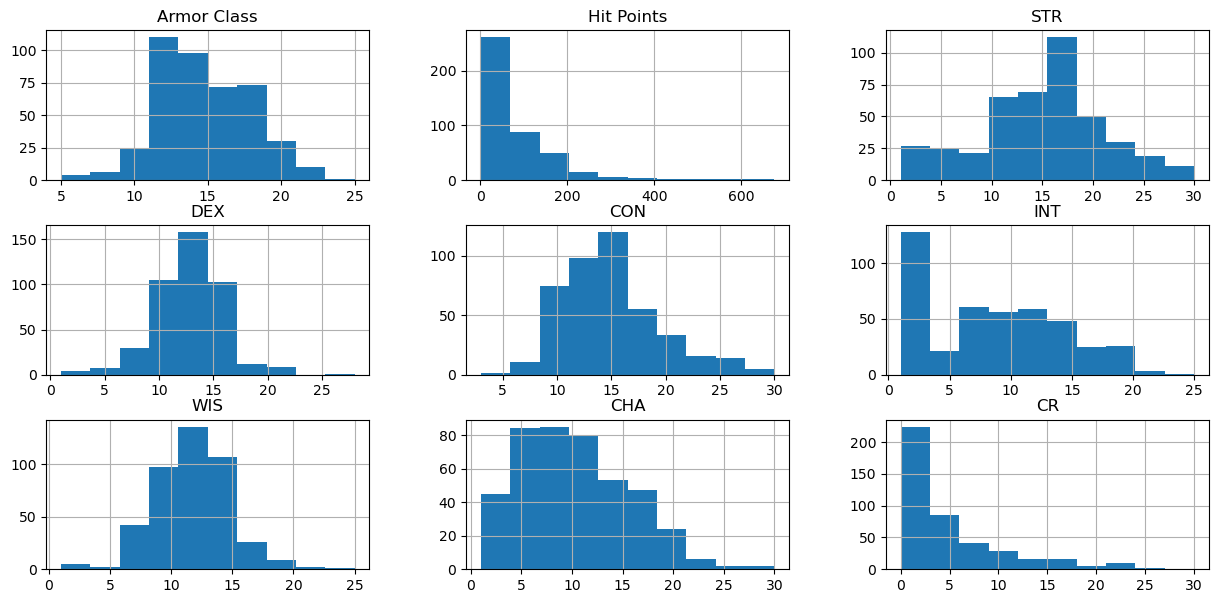

Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max
Armor Class,428.0,14.233645,3.155841,5.0,12.0,14.0,17.0,25.0
Hit Points,428.0,79.168224,91.606197,1.0,19.0,51.0,110.0,676.0
STR,428.0,15.025701,6.388059,1.0,11.0,16.0,19.0,30.0
DEX,428.0,12.808411,3.128882,1.0,10.0,13.0,15.0,28.0
CON,428.0,15.004673,4.356478,3.0,12.0,14.0,17.0,30.0
INT,428.0,8.488318,5.519593,1.0,3.0,9.0,12.0,25.0
WIS,428.0,11.735981,2.936154,1.0,10.0,12.0,13.0,25.0
CHA,428.0,10.100467,5.535637,1.0,6.0,9.5,14.0,30.0
CR,428.0,4.552278,5.596778,0.0,0.5,2.0,6.0,30.0


In [145]:
# Análisis de histogramas y estadísticas descriptivas del DF

numeric_df.hist(bins=10, figsize=(15, 7)) # Histograma de cada columna para ver su como es su distribución
plt.show()

#Estadísticas descriptivas del DF
df_stats=df.describe().T #Estadísticas transpuestas para facilitar la normalización
print("Estadísticas descriptivas:")
df_stats

In [146]:
# Normalización del dataframe y eliminación de columnas no numéricas
# Si es mayor o igual a 3, el resultado es que el enemigo puede ser un jefe para una party (1) o si es un enemigo normal para esta (0)

df_nuevo = numeric_df

df_nuevo['CR'] = df_nuevo['CR'].apply(lambda x: 0 if x < 3 else 1) 

columnas_Normalizadas = df.columns[:-1] #Selecciono todas las columnas a normalizar (menos CR)

# Normalizar las columnas seleccionadas
for column in columnas_Normalizadas:
    min_val = df[column].min()
    max_val = df[column].max()
    df[column] = (df[column] - min_val) / (max_val - min_val)

df_nuevo.to_csv('Actualizado_DnD5e_Monsters_Stats.csv',index=False) #Actualizo la base con los datos normalizados
df_nuevo


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [141]:
#Nueva matriz de correlación con los datos normalizados
matriz_correlacion = df_nuevo.corr()

print("Matriz de Correlación:")
matriz_correlacion

Matriz de Correlación:


,Armor Class,Hit Points,STR,DEX,CON,INT,WIS,CHA,CR
Armor Class,1.000000,0.689411,0.559285,0.259032,0.655396,0.590243,0.476521,0.639579,0.739156
Hit Points,0.689411,1.000000,0.737359,-0.083645,0.868687,0.490320,0.442377,0.592163,0.933268
STR,0.559285,0.737359,1.000000,-0.218743,0.848086,0.310819,0.344478,0.429674,0.677147
DEX,0.259032,-0.083645,-0.218743,1.000000,-0.155937,0.273928,0.358252,0.269375,0.013128
CON,0.655396,0.868687,0.848086,-0.155937,1.000000,0.425709,0.409846,0.541861,0.824834
INT,0.590243,0.490320,0.310819,0.273928,0.425709,1.000000,0.632674,0.893249,0.604942
WIS,0.476521,0.442377,0.344478,0.358252,0.409846,0.632674,1.000000,0.703053,0.536870
CHA,0.639579,0.592163,0.429674,0.269375,0.541861,0.893249,0.703053,1.000000,0.683857
CR,0.739156,0.933268,0.677147,0.013128,0.824834,0.604942,0.536870,0.683857,1.000000
